## Introduction
Inferential Statistics is the process of examining the observed data (sample) in order to make conclusions about properties/parameter of a Population. 

The conclusion of a statistical inference is called a *statistical proposition*. Some common forms are the following:

+ a point estimate (mean)
+ an interval estimate (confidence interval)
+ rejection of a hypothesis (hypothesis testing)
+ clustering or classification of individual data points into groups (Machine Learning techniques, Regression, Classification)

The classic approach for Inferential Statistics requires to make assumptions about the population distribution - which is **unknown**. If we knew about the Population, there would be no need for Inference!

Hence, using analytical formulas - and making wild assumptions while at it - is not advised. Especially nowadays: with the available processing power and so many readily available programming tools, we can easily make inferences over simulated data distribution.

This notebook will cover **Confidence Interval**.

## Confidence Interval
Importing necessary libraries and loading the example dataset. 

This fictitious dataset contains the average height (in centimeters) of undergrad students, as well as categorical information about age and if they drink coffee.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.titleweight']= 'bold'

np.random.seed(42)

df_full = pd.read_csv('undergrad_students.csv')
df_full.head(3)

,user_id,age,drinks_coffee,height
0,4509,<21,False,163.93
1,1864,>=21,True,167.19
2,2060,<21,False,181.15


We are interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers.

$$ Height_{Coffee} = Height_{No \space Coffee} $$

Our research question can be rewritten as:<br>
The difference between the average height of Coffee drinkers and No Coffee drinker is equal to zero.

$$ Height_{Coffee} - Height_{No \space Coffee} = 0$$

First, let's create a sample of size 200 from our full dataset. We will call it the "*Original Sample*".

Then, we can use the Bootstrapping technique to generate the Sampling Distribution based on the Original Sample.

Finally, we calculate the average height of each group of interest (coffee drinker vs no coffee), compute their difference, and store it in a list called `diffs`. 

We repeat this process 10,000 times so the Central Limit Theory "kicks-in", resulting in a normally distributed difference in average heights.

> **Note**: this process yields 3 arrays of size 10,000: average height of coffee drinkers; average height of those who do not drink coffee, and the difference in means.

In [5]:
df_sample = df_full.sample(200)

In [9]:
# instantiate empty list
diffs = []

# Bootstraping 10,000 times
for _ in range(10_000):
    boot_sample = df_sample.sample(len(df_sample), replace=True)
    avg_height_coffee = boot_sample.query('drinks_coffee == True').height.mean()
    avg_height_not_coffee = boot_sample.query('drinks_coffee == False').height.mean()
    diffs.append(avg_height_coffee - avg_height_not_coffee)

In [15]:
print(f'Sampling Distribution Mean: {np.mean(diffs):.3f} cm')
print(f'Sampling Distribution Std: {np.std(diffs):.3f} cm')

Sampling Distribution Mean: 3.970 cm
Sampling Distribution Std: 1.042 cm


In [14]:
# Actual difference in average height, based on the original sample
height_coffee = df_sample.query('drinks_coffee == True').height
height_no_coffee = df_sample.query('drinks_coffee == False').height

actual_avg_height_difference = height_coffee.mean() - height_no_coffee.mean()
print(f'Original Sample average height difference: {actual_avg_height_difference:.3f} cm')

Original Sample average height difference: 3.977 cm


Checking the difference between the average height of both groups, we can see the mean of our Sampling Distribution (3.970 cm) closely approximates the actual  average height difference observed in the original sample (3.977 cm).

### Calculating Lower and Upper Bounds
Lastly, let's find the lower and upper bounds of the interval containing the correct parameter with a confidence level of 95%: <br>
$$\alpha = 0.05$$

In [20]:
alpha = 5.0
lower, upper = np.percentile(diffs, alpha/2) , np.percentile(diffs, 100 - alpha/2)
print(f'Confidence Interval: [{lower:.2f}, {upper:.2f}]')

Confidence Interval: [1.95, 6.04]


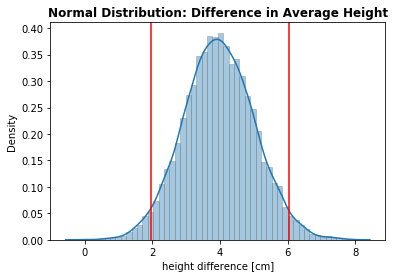

In [25]:
sns.distplot(diffs, hist_kws={'edgecolor':'gray'})
plt.title('Normal Distribution: Difference in Average Height')
plt.xlabel('height difference [cm]')
plt.ylabel('Density');
plt.axvline(lower, color='r')
plt.axvline(upper, color='r');

In [30]:
CI_width = upper - lower
print(f'Average Height Difference: {np.mean(diffs):.2f} cm')
print(f'Margin of error: {CI_width/2:.2f} cm')

Average Height Difference: 3.97 cm
Margin of error: 2.05 cm


### Interpretation
Since the Confidence Interval does not contain (overlap) zero, there is evidence that suggests there is indeed a difference in the population height of those sub-groups. As a matter of fact, there is a substantial difference since the lower bound is far from zero.

>$\implies$ We have evidence to support that, on average, coffee drinkers are taller than those who do not drink coffee. We can infer, with 95% confidence, the average height difference is 4 cm with a margin of error of 2 cm.

+ $\uparrow$ bigger sample size $\therefore$ $\downarrow$ narrower Confidence Interval width
+ **Margin of Error**: Confidence Interval width / 2